# q1

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## a

In [4]:
# Load the California housing dataset
california = fetch_california_housing()

# Part a: Display the description of the dataset
description = california.DESCR

## b

In [11]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

# c

In [21]:
correlation_matrix = california_df.corr().round(2)
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00


## d

In [30]:
california_df['MEDV'] = california.target

## e

In [32]:
correlation_matrix = california_df.corr().round(2)

In [36]:
min_corr = correlation_matrix['MEDV'].idxmin()
max_corr = correlation_matrix['MEDV'].idxmax()

## f

In [38]:
X = california_df[[min_corr, max_corr]]  # Training variables with min and max self-correlation
y = california_df['MEDV']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## g

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## h

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# o/p

In [43]:
description, correlation_matrix, min_corr, max_corr, mse, rmse, r2

('.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,00

# q2

In [44]:
from sklearn.linear_model import Ridge

In [56]:
ridge_rmse_list = []
ridge_r2_list = []

# Loop over alpha values from 0 to 100 with a step of 5 for Ridge
alpha_values_ridge = np.arange(0, 105, 5)  # 0 to 100 inclusive

for alpha in alpha_values_ridge:
    # Train the Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate RMSE and R2 score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the lists
    ridge_rmse_list.append(rmse)
    ridge_r2_list.append(r2)

results = pd.DataFrame({
    'Alpha': alpha_values_ridge,
    'RMSE': ridge_rmse_list,
    'R2': ridge_r2_list
})

results

,Alpha,RMSE,R2
0,0,5.794694e-15,1.000000
1,5,2.984925e-04,1.000000
2,10,5.968269e-04,1.000000
3,15,8.950033e-04,0.999999
4,20,1.193022e-03,0.999999
5,25,1.490882e-03,0.999998
6,30,1.788585e-03,0.999998
7,35,2.086131e-03,0.999997
8,40,2.383519e-03,0.999996
9,45,2.680750e-03,0.999995


# q3

In [46]:
from sklearn.linear_model import Lasso

In [63]:
# Initialize lists to store RMSE and R2 scores for Lasso regression
lasso_rmse_list = []
lasso_r2_list = []

# Loop over alpha values from 0.01 to 100 with a step of 5
alpha_values_lasso = np.arange(0.01, 105, 5)  # Start from 0.01 to avoid the warning

for alpha in alpha_values_lasso:
    # Train the Lasso Regression model
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate RMSE and R2 score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the lists
    lasso_rmse_list.append(rmse)
    lasso_r2_list.append(r2)

# Output the alpha values with corresponding RMSE and R2 scores
results = pd.DataFrame({
    'Alpha': alpha_values_lasso,
    'Lasso RMSE': lasso_rmse_list,
    'Lasso R2': lasso_r2_list
})

results


,Alpha,Lasso RMSE,Lasso R2
0,0.01,0.008552,0.999944
1,5.01,1.145664,-0.000004
2,10.01,1.145664,-0.000004
3,15.01,1.145664,-0.000004
4,20.01,1.145664,-0.000004
5,25.01,1.145664,-0.000004
6,30.01,1.145664,-0.000004
7,35.01,1.145664,-0.000004
8,40.01,1.145664,-0.000004
9,45.01,1.145664,-0.000004


# q4

In [51]:
import matplotlib.pyplot as plt

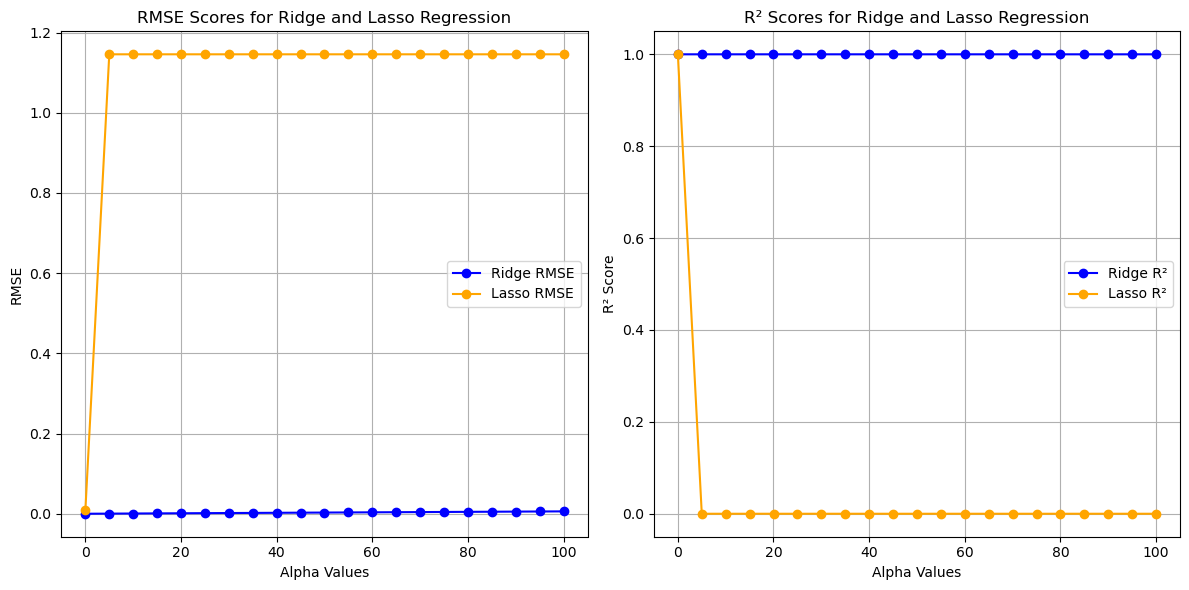

In [64]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(alpha_values_ridge, ridge_rmse_list, marker='o', label='Ridge RMSE', color='blue')
plt.plot(alpha_values_lasso, lasso_rmse_list, marker='o', label='Lasso RMSE', color='orange')
plt.title('RMSE Scores for Ridge and Lasso Regression')
plt.xlabel('Alpha Values')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

# Plotting R² Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(alpha_values_ridge, ridge_r2_list, marker='o', label='Ridge R²', color='blue')
plt.plot(alpha_values_lasso, lasso_r2_list, marker='o', label='Lasso R²', color='orange')
plt.title('R² Scores for Ridge and Lasso Regression')
plt.xlabel('Alpha Values')
plt.ylabel('R² Score')
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()